# **LSTM** for Stock Market Predicition


[*********************100%%**********************]  1 of 1 completed


Epoch 1/5
74/74 [==============================] - 11s 58ms/step - loss: 0.0011
Epoch 2/5
74/74 [==============================] - 3s 36ms/step - loss: 4.5653e-05
Epoch 3/5
74/74 [==============================] - 3s 35ms/step - loss: 4.4798e-05
Epoch 4/5
74/74 [==============================] - 3s 36ms/step - loss: 4.2381e-05
Epoch 5/5
74/74 [==============================] - 2s 14ms/step - loss: 3.5672e-05
Test Loss : 3.56716918759048e-05
74/74 [==============================] - 2s 14ms/step


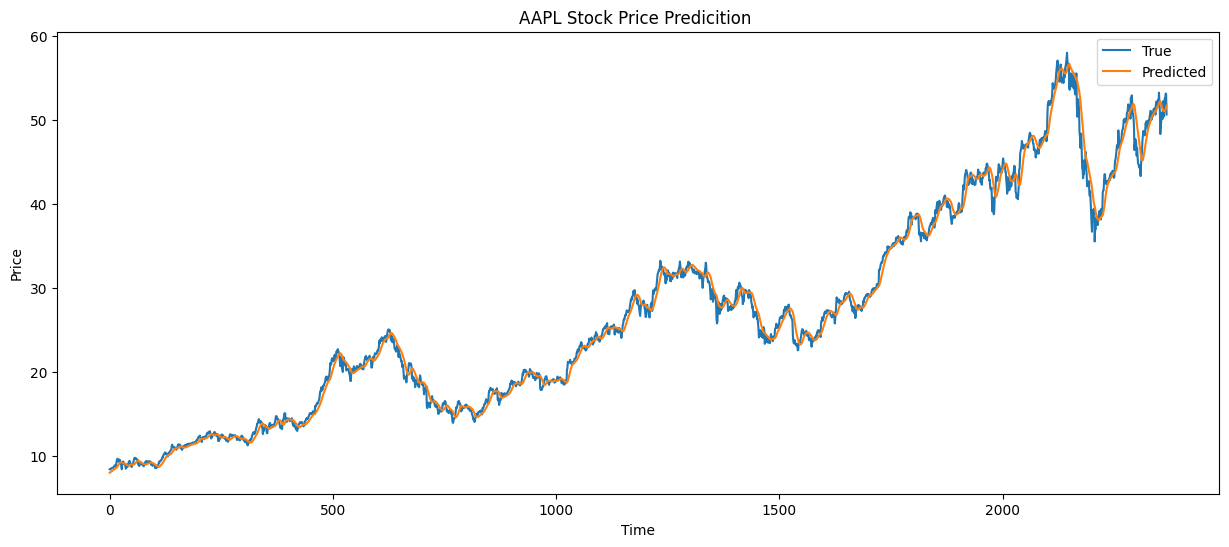

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Download historical stock data
stock_symbol = "AAPL"      # Apple Inc, stock symbol
data = yf.download(stock_symbol, start = "2010-01-01", end = "2022-01-01")

#Extract CLOSE prices
df = data[['Close']].copy()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

#Create sequences
seq_length = 60

def create_sequences(data, seq_length):
  sequences=[]
  for i in range(len(data) - seq_length):
    seq = data[i:i + seq_length]
    sequences.append(seq)
  return np.array(sequences)

sequences = create_sequences(scaled_data, seq_length)

# Split data into training and testing sets
train_size = int(0.8 * len(sequences))
train_data = sequences[:train_size]
test_data = sequences [:train_size:]
X_train = train_data[:,:-1]
y_train = train_data[:,-1]
X_test = test_data[:,:-1]
y_test = test_data[:,-1]

# Build LSTM model
model = Sequential([
    LSTM(units = 50, return_sequences = True, input_shape = (seq_length -1, 1)),    # returns seq to next lstm layer
    LSTM(units = 50),    # returns final o/p to dense layer
    Dense(units = 1)
    ])

# Compile the model
model.compile(optimizer = 'adam', loss = 'mse')

# Train the model
model.fit(X_train, y_train, epochs = 5, batch_size = 32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss : {loss}')

# Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)                           # Inverse transfrom the prediction

# Plotting
plt.figure(figsize = (15,6))
plt.title(f"{stock_symbol} Stock Price Predicition ")
plt.xlabel("Time")
plt.ylabel("Price")
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)), label = True)
plt.plot(predictions, label = 'Predicted')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


Epoch 1/5
74/74 [==============================] - 7s 50ms/step - loss: 0.0025
Epoch 2/5
74/74 [==============================] - 3s 36ms/step - loss: 7.4585e-05
Epoch 3/5
74/74 [==============================] - 3s 37ms/step - loss: 7.5072e-05
Epoch 4/5
74/74 [==============================] - 3s 37ms/step - loss: 6.7691e-05
Epoch 5/5
74/74 [==============================] - 2s 14ms/step - loss: 6.1186e-05
Test Loss : 6.118619057815522e-05
74/74 [==============================] - 2s 14ms/step


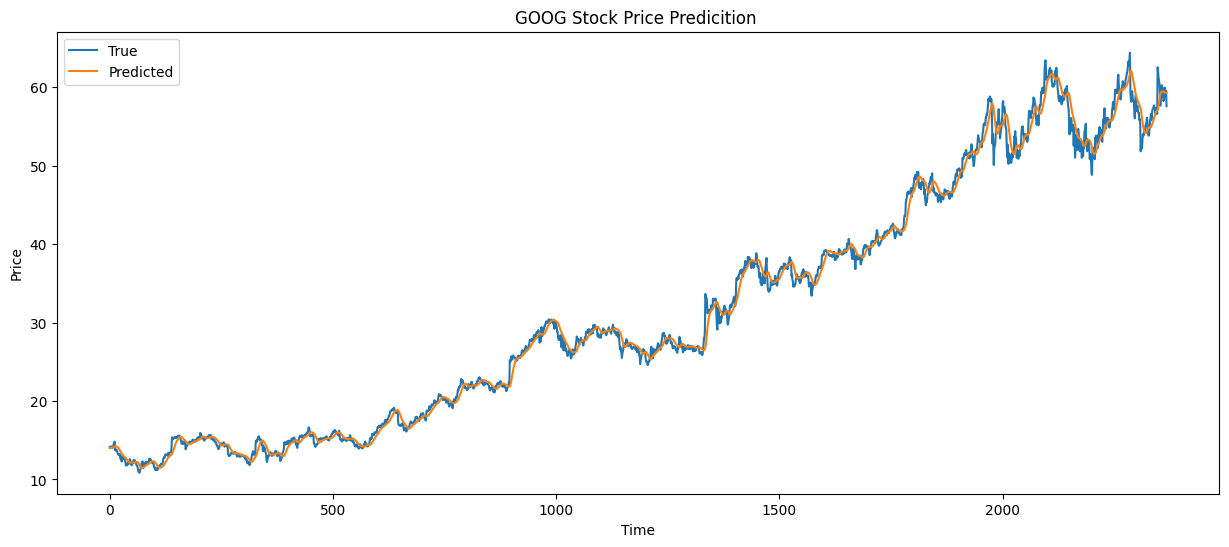

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Download historical stock data
stock_symbol = "GOOG"      # google, stock symbol
data = yf.download(stock_symbol, start = "2010-01-01", end = "2022-01-01")

#Extract CLOSE prices
df = data[['Close']].copy()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

#Create sequences
seq_length = 60

def create_sequences(data, seq_length):
  sequences=[]
  for i in range(len(data) - seq_length):
    seq = data[i:i + seq_length]
    sequences.append(seq)
  return np.array(sequences)

sequences = create_sequences(scaled_data, seq_length)

# Split data into training and testing sets
train_size = int(0.8 * len(sequences))
train_data = sequences[:train_size]
test_data = sequences [:train_size:]
X_train = train_data[:,:-1]
y_train = train_data[:,-1]
X_test = test_data[:,:-1]
y_test = test_data[:,-1]

# Build LSTM model
model = Sequential([
    LSTM(units = 50, return_sequences = True, input_shape = (seq_length -1, 1)),    # returns seq to next lstm layer
    LSTM(units = 50),    # returns final o/p to dense layer
    Dense(units = 1)
    ])

# Compile the model
model.compile(optimizer = 'adam', loss = 'mse')

# Train the model
model.fit(X_train, y_train, epochs = 5, batch_size = 32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss : {loss}')

# Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)                           # Inverse transfrom the prediction

# Plotting
plt.figure(figsize = (15,6))
plt.title(f"{stock_symbol} Stock Price Predicition ")
plt.xlabel("Time")
plt.ylabel("Price")
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)), label = True)
plt.plot(predictions, label = 'Predicted')
plt.legend()
plt.show()